In [1]:
import pandas as pd
import numpy as np

import pickle
import gzip

with gzip.open('isang_data_scale.pickle','rb') as f:
    data_lst = pickle.load(f)
    
with gzip.open('isang_value_scale.pickle','rb') as f:
    value = pickle.load(f)

/usr/local/lib/python3.8/dist-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
pd.DataFrame(data_lst[0])

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-1.094610,0.510972,-0.479930,-1.494328,-0.868568,-1.474788,-0.875780,-0.838624,0.0,0.0,...,3.184595,0.890969,-0.975900,-0.295822,-0.951457,-1.590157,0.800508,0.0,-2.499666,-1.268536
1,-1.094610,0.793438,-0.479930,-1.494328,-0.868568,-1.474788,-0.875780,-0.838624,0.0,0.0,...,3.184595,0.890969,-0.975900,-0.687277,-0.951457,-1.590157,0.800508,0.0,-2.499666,-1.268536
2,0.741790,-0.156674,1.381446,0.669197,1.283904,0.146139,-0.653416,0.219378,0.0,0.0,...,3.184595,0.890969,-0.975900,-0.850221,-0.951457,-0.821849,0.800508,0.0,-2.499666,-1.268536
3,0.463548,0.562330,1.381446,0.669197,1.283904,0.146139,-0.653416,0.219378,0.0,0.0,...,3.184595,0.890969,1.024695,0.014926,1.295881,-0.821849,0.800508,0.0,-2.499666,-1.268536
4,-0.872016,1.152940,1.381446,0.669197,1.283904,0.146139,-0.653416,0.219378,0.0,0.0,...,3.184595,0.890969,1.024695,0.027875,0.060131,-0.821849,0.800508,0.0,-2.499666,-1.268536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487709,-0.836727,1.621280,1.487938,-1.494328,-1.499208,-1.158265,-0.875780,-0.576729,0.0,0.0,...,0.367507,0.890969,1.024695,-0.504069,-0.781456,0.133474,-0.315913,0.0,-0.905158,-1.268536
6487710,-0.778400,-1.567801,0.516471,0.669197,-1.147986,-0.070560,1.005007,-0.698032,0.0,0.0,...,-0.571522,-1.122373,-0.975900,2.746956,1.295881,0.296698,-0.997878,0.0,-0.742517,-1.268536
6487711,-0.611241,-1.543324,-1.011123,0.669197,-0.967057,-0.681083,-0.670866,-0.461675,0.0,0.0,...,-0.571522,-1.122373,-0.975900,2.746956,1.295881,0.296698,0.300993,0.0,0.299454,0.788310
6487712,-0.431193,0.344816,-0.202143,0.612634,-1.485495,-0.026901,0.522354,-0.451550,0.0,0.0,...,1.751501,0.838332,-0.975900,1.893171,1.931655,-0.841936,1.342561,0.0,0.696354,0.788310


In [3]:
value[1]

0          0
1          0
2          0
3          0
4          1
          ..
3577312    0
3577313    0
3577314    0
3577315    0
3577316    0
Name: is_applied, Length: 3577317, dtype: int64

In [2]:
X_train = pd.DataFrame(data_lst[0])
X_dev = pd.DataFrame(data_lst[1])
test = pd.DataFrame(data_lst[2])

y_train = value[0]
y_dev = value[1]

Data column명 변경

In [3]:
column_name = ['loan_limit', 'loan_rate', 'birth_year', 'gender', 'credit_score',
       'yearly_income', 'company_enter_month', 'desired_amount',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'continuous_use',
       'event_nunique', 'event_count', 'have_a', 'have_b', 'have_c', 'have_d',
       'have_e', 'have_f', 'have_g', 'have_h', 'have_i', 'have_j', 'have_k',
       'most_week', 'employment_type_계약직', 'employment_type_기타',
       'employment_type_일용직', 'employment_type_정규직', 'houseown_type_기타가족소유',
       'houseown_type_배우자', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입', 'purpose_투자',
       'income_type_EARNEDINCOME', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_OTHERINCOME',
       'income_type_PRACTITIONER', 'income_type_PRIVATEBUSINESS', 'time_days',
       'mp_os_Android', 'mp_os_iOS', 'most_time_dawn', 'most_time_morning',
       'most_time_night', 'most_time_nan', 'over_5minutes', 'over_10minutes',
       'over_1hour', 'over_1day', 'interest_rate', 'st_interest',
       'st_interest_rate', 'it_sensitivity', 'it_sensitivity_1',
       'desired_amount_YN', 'desired_amount_rate', 'desired_amount_over',
       'credit_score_f', 'loan_sum', 'loan_mean', 'visit_count',
       'over_credit_interest', 'over_interest', 'product_applied',
       'bank_applied', 'line_app_applied', 'loanapply_insert_weekday',
       'loanapply_insert_jumal', 'loanapply_insert_hour',
       'loanapply_insert_ohu']

X_train.columns = column_name
X_dev.columns = column_name
test.columns = column_name

### 모델링

In [4]:
# Data Wrangling
import pandas as pd

from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline
rc('font', family='malgun gothic')
import seaborn as sns
%matplotlib inline

# EDA

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from random import uniform
from scipy.stats import gmean
from scipy.stats import randint

# Hyperparameter Optimization
#import optuna                                            
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from sklearn.decomposition import PCA
import datetime
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss

In [6]:
X_train.shape, X_dev.shape, y_train.shape, y_dev.shape

((6487714, 81), (3577317, 81), (6487714,), (3577317,))

In [19]:
clfs_tuned = []

#### LGBM

In [8]:
#from sklearn.metrics import make_scorer
#myscore = make_scorer(f1_score, average='macro')
import optuna

In [ ]:
def objective(trial):
    lgbm_learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1)
    lgbm_n_estimators = trial.suggest_int("n_estimators", 500, 3000)
    lgbm_max_depth = trial.suggest_int("max_depth", 5, 50)
    lgbm_subsample = trial.suggest_float("subsample", 0.8, 1)
    lgbm_colsample_bytree = trial.suggest_float("colsample_bytree", 0.7, 0.95)
    lgbm_min_child_samples = trial.suggest_int("min_child_samples", 5, 40)
    lgbm_num_leaves = trial.suggest_int("num_leaves", 5, 40)

    
    classifier_obj = LGBMClassifier(learning_rate=lgbm_learning_rate,
                                    n_estimators=lgbm_n_estimators,
                                    max_depth = lgbm_max_depth, # 과적합된 것 같다 _ max_depth 값을 줄이기
                                    subsample = lgbm_subsample,
                                    colsample_bytree = lgbm_colsample_bytree,
                                    min_child_samples = lgbm_min_child_samples, # 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지
                                    num_leaves = lgbm_num_leaves,
                                    application ='binary',
                                    # num_leaves의 개수를 높이면 정확도가 높아지지만, 
                                    # 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커짐
                                    random_state=2020
                                    )
    classifier_obj.fit(X_train, y_train)
    
    preds = classifier_obj.predict(X_dev)
    #probs = classifier_obj.predict_proba(X_dev)

    # Metrics
    f1 = f1_score(y_dev, preds, average='macro')
    
    return f1


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-10-12 17:54:29,274] A new study created in memory with name: no-name-682b57f5-dc84-4bf8-844c-c8851b2c12d3
[I 2022-10-12 18:02:33,808] Trial 0 finished with value: 0.310108688985308 and parameters: {'learning_rate': 0.08484520676548311, 'n_estimators': 2937, 'max_depth': 44, 'subsample': 0.8458798759078779, 'colsample_bytree': 0.7396805985299568, 'min_child_samples': 15, 'num_leaves': 30}. Best is trial 0 with value: 0.310108688985308.
[I 2022-10-12 18:13:24,389] Trial 1 finished with value: 0.3488054838744549 and parameters: {'learning_rate': 0.02670613010938743, 'n_estimators': 2533, 'max_depth': 6, 'subsample': 0.8467114837834406, 'colsample_bytree': 0.8582612599654333, 'min_child_samples': 22, 'num_leaves': 40}. Best is trial 1 with value: 0.3488054838744549.
[I 2022-10-12 18:18:37,585] Trial 2 finished with value: 0.4470189765478695 and parameters: {'learning_rate': 0.027474535999186846, 'n_estimators': 1072, 'max_depth': 47, 'subsample': 0.8830948233918493, 'colsample_bytr

In [14]:
#max_lgbm = study.best_params
max_lgbm = {'learning_rate': 0.009005688196459308,
 'n_estimators': 835,
 'max_depth': 15,
 'subsample': 0.9576877183984386,
 'colsample_bytree': 0.7655760546960592,
 'min_child_samples': 35,
 'num_leaves': 12}

In [15]:
lgbm_tune = LGBMClassifier(**max_lgbm, n_jobs=-1)
lgbm_tune.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7655760546960592,
               learning_rate=0.009005688196459308, max_depth=15,
               min_child_samples=35, n_estimators=835, num_leaves=12,
               subsample=0.9576877183984386)

In [16]:
joblib.dump(lgbm_tune, '../model/lgbm_tune.pkl')

['../model/lgbm_tune.pkl']

In [22]:
max2_lgbm = {'learning_rate': 0.015988703922586642, 'n_estimators': 550, 'max_depth': 30, 
             'subsample': 0.998622545446175, 'colsample_bytree': 0.9139873162703811, 'min_child_samples': 26, 
             'num_leaves': 9}
lgbm_tune2 = LGBMClassifier(**max2_lgbm, n_jobs=-1)
lgbm_tune2.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.9139873162703811,
               learning_rate=0.015988703922586642, max_depth=30,
               min_child_samples=26, n_estimators=550, num_leaves=9,
               subsample=0.998622545446175)

In [23]:
lgbm_tune_pred = lgbm_tune.predict(X_dev)
lgbm_tune_proba = lgbm_tune.predict_proba(X_dev)[:,1]

In [24]:
lgbm_tune2_pred = lgbm_tune2.predict(X_dev)
lgbm_tune2_proba = lgbm_tune2.predict_proba(X_dev)[:,1]

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_dev, lgbm_tune_pred))
print(classification_report(y_dev, lgbm_tune2_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94   3376196
           1       0.25      0.42      0.31    201121

    accuracy                           0.89   3577317
   macro avg       0.60      0.67      0.63   3577317
weighted avg       0.92      0.89      0.91   3577317

              precision    recall  f1-score   support

           0       0.96      0.92      0.94   3376196
           1       0.24      0.43      0.31    201121

    accuracy                           0.89   3577317
   macro avg       0.60      0.68      0.63   3577317
weighted avg       0.92      0.89      0.91   3577317



In [26]:
print('f1 score : ', f1_score(y_dev, lgbm_tune_pred))
print('precision score : ', precision_score(y_dev, lgbm_tune_pred))
print('recall score : ', recall_score(y_dev, lgbm_tune_pred))
print('rocauc : ', roc_auc_score(y_dev,lgbm_tune_proba))

print(confusion_matrix(y_dev,lgbm_tune_pred))

f1 score :  0.3093872090501795
precision score :  0.24538763136031716
recall score :  0.41854903267187415
rocauc :  0.834488185025864
[[3117330  258866]
 [ 116942   84179]]


In [27]:
f1_score(y_dev, lgbm_tune_pred, average='macro')

0.6262683856147192

In [28]:
print('f1 score : ', f1_score(y_dev, lgbm_tune2_pred))
print('precision score : ', precision_score(y_dev, lgbm_tune2_pred))
print('recall score : ', recall_score(y_dev, lgbm_tune2_pred))
print('rocauc : ', roc_auc_score(y_dev,lgbm_tune2_proba))

print(confusion_matrix(y_dev,lgbm_tune2_pred))

f1 score :  0.3097867164144598
precision score :  0.24114435381608165
recall score :  0.43305771152689176
rocauc :  0.8337395650527896
[[3102111  274085]
 [ 114024   87097]]


In [29]:
f1_score(y_dev, lgbm_tune2_pred, average='macro')

0.6254569570313787

In [30]:
# f1 macro, roc auc score가 더 높은 모델1을 선택
clfs_tuned.append((type(lgbm_tune).__name__, 
                   lgbm_tune, 
                   f1_score(y_dev, lgbm_tune_pred)))
clfs_tuned[0]

('LGBMClassifier',
 LGBMClassifier(colsample_bytree=0.7655760546960592,
                learning_rate=0.009005688196459308, max_depth=15,
                min_child_samples=35, n_estimators=835, num_leaves=12,
                subsample=0.9576877183984386),
 0.3093872090501795)

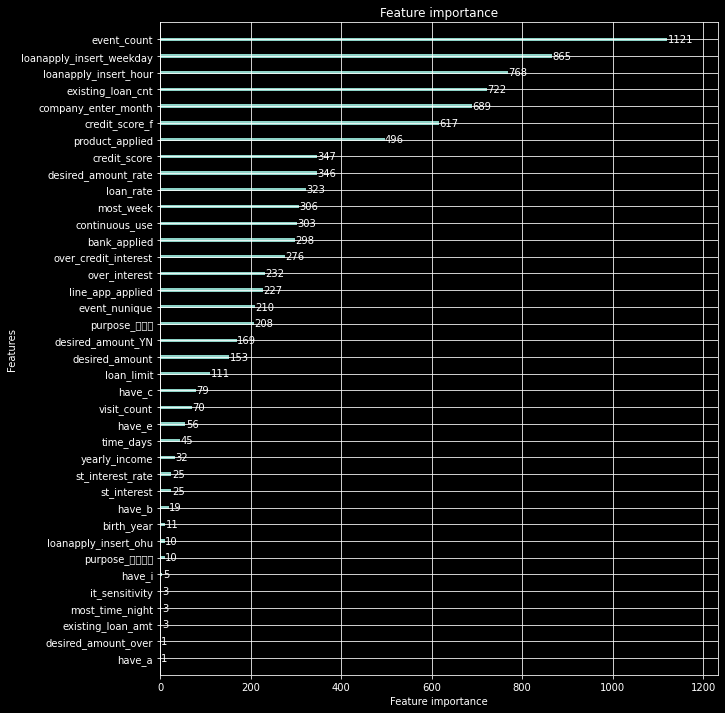

In [33]:
# Feature importance 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_tune, ax=ax)
plt.show()

In [56]:
# Feature importance가 10 이상인 Feature들만 사용
top32_feature = pd.DataFrame({'name': lgbm_tune.feature_name_, 'importance':lgbm_tune.feature_importances_}).sort_values(by='importance', ascending=False).query('importance>=10')
top32_feature

,name,importance
14,event_count,1121
77,loanapply_insert_weekday,865
79,loanapply_insert_hour,768
10,existing_loan_cnt,722
6,company_enter_month,689
68,credit_score_f,617
74,product_applied,496
4,credit_score,347
66,desired_amount_rate,346
1,loan_rate,323


In [57]:
top32_feature.name.unique()

array(['event_count', 'loanapply_insert_weekday', 'loanapply_insert_hour',
       'existing_loan_cnt', 'company_enter_month', 'credit_score_f',
       'product_applied', 'credit_score', 'desired_amount_rate',
       'loan_rate', 'most_week', 'continuous_use', 'bank_applied',
       'over_credit_interest', 'over_interest', 'line_app_applied',
       'event_nunique', 'purpose_생활비', 'desired_amount_YN',
       'desired_amount', 'loan_limit', 'have_c', 'visit_count', 'have_e',
       'time_days', 'yearly_income', 'st_interest_rate', 'st_interest',
       'have_b', 'birth_year', 'purpose_대환대출', 'loanapply_insert_ohu'],
      dtype=object)

In [63]:
# feature importance가 10이상인 32개의 feature로 다시 만든 train, test 데이터
X_train2 = X_train[top32_feature.name.unique()]
X_dev2 = X_dev[top32_feature.name.unique()]
test2 = test[top32_feature.name.unique()]

In [67]:
lgbm_tune3 = LGBMClassifier(**max_lgbm, n_jobs=-1)
lgbm_tune3.fit(X_train2, y_train)

LGBMClassifier(colsample_bytree=0.7655760546960592,
               learning_rate=0.009005688196459308, max_depth=15,
               min_child_samples=35, n_estimators=835, num_leaves=12,
               subsample=0.9576877183984386)

In [69]:
lgbm_tune3_pred = lgbm_tune3.predict(X_dev2)
lgbm_tune3_proba = lgbm_tune3.predict_proba(X_dev2)[:,1]

In [70]:
print(classification_report(y_dev, lgbm_tune3_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94   3376196
           1       0.24      0.43      0.31    201121

    accuracy                           0.89   3577317
   macro avg       0.60      0.67      0.62   3577317
weighted avg       0.92      0.89      0.91   3577317



In [71]:
print('f1 score : ', f1_score(y_dev, lgbm_tune3_pred))
print('precision score : ', precision_score(y_dev, lgbm_tune3_pred))
print('recall score : ', recall_score(y_dev, lgbm_tune3_pred))
print('rocauc : ', roc_auc_score(y_dev,lgbm_tune3_proba))

print(confusion_matrix(y_dev,lgbm_tune3_pred))

f1 score :  0.3085352241667978
precision score :  0.2409513671782235
recall score :  0.4288115114781649
rocauc :  0.8340420112998906
[[3104512  271684]
 [ 114878   86243]]


Feature Extract를 통해 모델을 돌려보았지만, 성능의 향상 X -> 그대로 Feature 사용!

### ExtraTree

In [34]:
# 모델이 너무 커지는 관계로 튜닝은 X
et_tune = ExtraTreesClassifier(random_state = 2020, n_jobs=-1)
et_tune.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=2020)

In [35]:
et_tune_pred = et_tune.predict(X_dev)
et_tune_proba = et_tune.predict_proba(X_dev)[:,1]

In [36]:
print(classification_report(y_dev, et_tune_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95   3376196
           1       0.26      0.35      0.30    201121

    accuracy                           0.91   3577317
   macro avg       0.61      0.65      0.62   3577317
weighted avg       0.92      0.91      0.91   3577317



In [37]:
print('f1 score : ', f1_score(y_dev, et_tune_pred))
print('precision score : ', precision_score(y_dev, et_tune_pred))
print('recall score : ', recall_score(y_dev, et_tune_pred))
print('rocauc : ', roc_auc_score(y_dev,et_tune_proba))


print(confusion_matrix(y_dev,et_tune_pred))

f1 score :  0.2976163147416178
precision score :  0.25644391536865274
recall score :  0.3545378155438766
rocauc :  0.8345415549155852
[[3169448  206748]
 [ 129816   71305]]


In [38]:
# threshold 0.5
clfs_tuned.append((type(et_tune).__name__, 
                   et_tune, 
                   f1_score(y_dev, et_tune_pred)))

IndexError: list index out of range

In [39]:
clfs_tuned[1]

('ExtraTreesClassifier',
 ExtraTreesClassifier(n_jobs=-1, random_state=2020),
 0.2976163147416178)

### CatBoost

In [72]:
cat_model=CatBoostClassifier(random_state=2020,iterations=18000,depth=3,eval_metric="F1") # learning rate = 0.078787

cat_model.fit(X_train, y_train, 
            eval_set=[(X_dev, y_dev)], 
            early_stopping_rounds=300 ,
            verbose = 100)

Learning rate set to 0.078787
0:	learn: 0.7601230	test: 0.1841165	best: 0.1841165 (0)	total: 982ms	remaining: 4h 54m 35s
100:	learn: 0.9285732	test: 0.2913982	best: 0.3062567 (60)	total: 48.9s	remaining: 2h 24m 23s
200:	learn: 0.9415250	test: 0.2654555	best: 0.3062567 (60)	total: 1m 31s	remaining: 2h 15m 19s
300:	learn: 0.9504289	test: 0.2651856	best: 0.3062567 (60)	total: 2m 14s	remaining: 2h 11m 58s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.3062566808
bestIteration = 60

Shrink model to first 61 iterations.


In [73]:
cat_model_pred = cat_model.predict(X_dev)
cat_model_proba = cat_model.predict_proba(X_dev)[:,1]

In [74]:
print(classification_report(y_dev, cat_model_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94   3376196
           1       0.24      0.43      0.31    201121

    accuracy                           0.89   3577317
   macro avg       0.60      0.67      0.62   3577317
weighted avg       0.92      0.89      0.90   3577317



In [75]:
print('f1 score : ', f1_score(y_dev, cat_model_pred))
print('precision score : ', precision_score(y_dev, cat_model_pred))
print('recall score : ', recall_score(y_dev, cat_model_pred))
print('rocauc : ', roc_auc_score(y_dev,cat_model_proba))


print(confusion_matrix(y_dev,cat_model_pred))

f1 score :  0.30625668081929075
precision score :  0.23710516556869246
recall score :  0.4323516688958388
rocauc :  0.8298458817416323
[[3096415  279781]
 [ 114166   86955]]


In [76]:
# threshold 0.5
clfs_tuned.append((type(cat_model).__name__, 
                   cat_model, 
                   f1_score(y_dev, cat_model_pred)))
clfs_tuned[2]

('CatBoostClassifier',
 0.30625668081929075)

### Ensemble

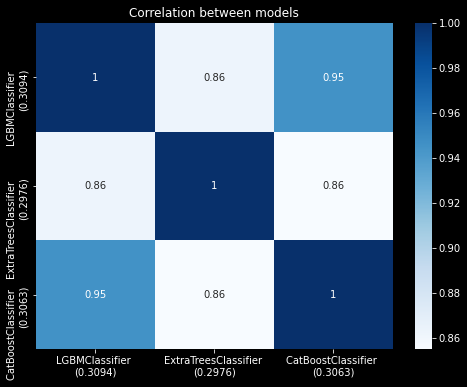

In [77]:
# 모델간 상관관계
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_dev)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [110]:
import gc
gc.collect()

101

In [104]:
# 모델 피클 저장
import joblib

joblib.dump(lgbm_tune, '../model/lgbm_tune.pkl')
joblib.dump(et_tune, '../model/et_tune.pkl')
joblib.dump(cat_model, '../model/cat_model.pkl')

['../model/cat_model.pkl']

---

### 3가지 모델 Ensemble

각각의 모델로 예측한 결과를 predict_proba하여 확률을 앙상블한 후 나온 최종 확률을 threshold 0.5를 기준으로 0, 1로 예측

In [17]:
import joblib

# 저장된 모델 불러오기
lgbm_tune = joblib.load('../model/lgbm_tune.pkl')
et_tune = joblib.load('../model/et_tune.pkl')
cat_model = joblib.load('../model/cat_model.pkl')

In [18]:
X_train.shape, X_dev.shape, y_train.shape, y_dev.shape

((6487714, 81), (3577317, 81), (6487714,), (3577317,))

In [19]:
lgbm_proba = lgbm_tune.predict_proba(X_dev)[:,1]
et_proba = et_tune.predict_proba(X_dev)[:,1]
cat_proba = cat_model.predict_proba(X_dev)[:,1]

**휴리스틱한 방법으로 최적의 조합 찾기**

lgbm_proba 0.4, et_proba 0.25, cat_proba 0.35일 때 최적의 조합!

In [134]:
model3_proba = lgbm_proba*0.4+et_proba*0.25+cat_proba*0.35
model3_proba

array([0.36758053, 0.4375083 , 0.43252504, ..., 0.22773896, 0.17068712,
       0.07133656])

In [135]:
model3_pred = pd.DataFrame(model3_proba)[0].apply(lambda x : 1 if x>0.45 else 0)
model3_pred

0          0
1          0
2          0
3          1
4          1
          ..
3577312    0
3577313    0
3577314    0
3577315    0
3577316    0
Name: 0, Length: 3577317, dtype: int64

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_dev, model3_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93   3376196
           1       0.23      0.52      0.32    201121

    accuracy                           0.87   3577317
   macro avg       0.60      0.71      0.62   3577317
weighted avg       0.93      0.87      0.90   3577317



In [137]:
roc_auc_score(y_dev, model3_proba)

0.8422315842667519

In [140]:
print(f1_score(y_dev, model3_pred))

0.31814024669077073


**휴리스틱한 방법으로 ensemble비율, threshold값을 바꾸어본 결과 위 결과에서 가장 높은 점수를 얻을 수 있었다.**

## 위와 같은 방식으로 5월 데이터 -> 6월 test 데이터 예측을 수행한다.

In [8]:
X_dev.shape, y_dev.shape, test.shape

((3577317, 81), (3577317,), (3255476, 81))

### 1. OverSampling & Scaling

5월 데이터 또한 4월 데이터로 학습했던 과정에 맞게 SMOTE를 진행\!  
기존의 값이 Scaling이 되어있어 다른 처리는 X

In [ ]:
from imblearn.over_sampling import SMOTE

In [10]:
smote = SMOTE(random_state=2020)
X_dev_over, y_dev_over = smote.fit_resample(X_dev, y_dev)

In [11]:
X_dev_over.shape, y_dev_over.shape, test.shape

((3577317, 81), (3577317,), (3255476, 81))

### 2. Modeling

In [15]:
# 모델 피클 저장
import joblib

#### lgbm

In [12]:
max_lgbm = {'learning_rate': 0.009005688196459308,
 'n_estimators': 835,
 'max_depth': 15,
 'subsample': 0.9576877183984386,
 'colsample_bytree': 0.7655760546960592,
 'min_child_samples': 35,
 'num_leaves': 12}

In [13]:
lgbm_final = LGBMClassifier(**max_lgbm, n_jobs=-1)
lgbm_final.fit(X_dev_over, y_dev_over)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7655760546960592, importance_type='split',
               learning_rate=0.009005688196459308, max_depth=15,
               min_child_samples=35, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=835, n_jobs=-1, num_leaves=12, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9576877183984386, subsample_for_bin=200000,
               subsample_freq=0)

In [16]:
joblib.dump(lgbm_final, '../model/lgbm_final.pkl')

['../model/lgbm_final.pkl']

In [5]:
import joblib

# 저장된 모델 불러오기
lgbm_final = joblib.load('../model/lgbm_final.pkl')

In [6]:
lgbm_final_pred = lgbm_final.predict(test)
lgbm_final_proba = lgbm_final.predict_proba(test)[:,1]

In [7]:
lgbm_final_pred

array([1, 0, 0, ..., 0, 0, 0])

#### ExtraTree

In [17]:
et_final = ExtraTreesClassifier(random_state = 2020, n_jobs=-1)
et_final.fit(X_dev_over, y_dev_over)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2020, verbose=0,
                     warm_start=False)

In [18]:
joblib.dump(et_final, '../model/et_final.pkl')

['../model/et_final.pkl']

In [8]:
et_final = joblib.load('../model/et_final.pkl')

In [9]:
et_final_pred = et_final.predict(test)
et_final_proba = et_final.predict_proba(test)[:,1]

#### CatBoost

In [ ]:
cat_final=CatBoostClassifier(random_state=2020,iterations=18000,depth=3,eval_metric="F1") # learning rate = 0.078787

cat_final.fit(X_dev_over, y_dev_over, 
            eval_set=[(X_dev, y_dev)], # 평가 데이터 정답이 없으므로 어쩔수없이 자기자신으로 예측 
            early_stopping_rounds=300 ,
            verbose = 100)

In [ ]:
joblib.dump(cat_final, '../model/cat_final.pkl')

In [40]:
cat_final = joblib.load('../model/cat_final.pkl')

In [41]:
cat_final_pred = cat_final.predict(test)
cat_final_proba = cat_final.predict_proba(test)[:,1]

In [42]:
cat_final_pred

array([1, 0, 1, ..., 0, 0, 0])

### 3. Ensemble

lgbm_proba 0.4, et_proba 0.25, cat_proba 0.35일 때 최적의 조합\!  
threshold는 0.45!!

In [43]:
# train과정의 비율 사용
final_proba = lgbm_final_proba*0.4+et_final_proba*0.25+cat_final_proba*0.35
final_proba

array([0.73622854, 0.37769241, 0.43814718, ..., 0.263107  , 0.04414416,
       0.15057956])

In [44]:
final_pred = pd.DataFrame(final_proba)[0].apply(lambda x : 1 if x>0.45 else 0)
final_pred

0          1
1          0
2          0
3          0
4          0
          ..
3255471    0
3255472    0
3255473    0
3255474    0
3255475    0
Name: 0, Length: 3255476, dtype: int64

In [45]:
final_pred.value_counts()

0    2874793
1     380683
Name: 0, dtype: int64

In [50]:
final_sub = pd.DataFrame(final_pred)
final_sub.columns = ['is_applied']

In [54]:
final_sub.to_csv('final_pred_lgbm_et_cat.csv', index=False)

### 4. Test데이터 정리

In [46]:
submission = pd.read_csv('데이터분석분야_퓨처스부문_평가데이터.csv')
submission

,application_id,product_id,is_applied
0,4,220,NaN
1,4,191,NaN
2,8,29,NaN
3,8,159,NaN
4,8,85,NaN
...,...,...,...
3255189,2167778,258,NaN
3255190,2167791,29,NaN
3255191,2167822,149,NaN
3255192,2167822,157,NaN


In [88]:
# 최종 sumission생성을 위한 is_applied열 제거
submission2 = submission.drop(columns=['is_applied']);submission2

,application_id,product_id
0,4,220
1,4,191
2,8,29
3,8,159
4,8,85
...,...,...
3255189,2167778,258
3255190,2167791,29
3255191,2167822,149
3255192,2167822,157


In [56]:
with gzip.open('../data/value2.pickle','rb') as f:
    value2 = pickle.load(f)

In [70]:
pre_sub = value2[2]
pre_sub

,is_applied,application_id,product_id,user_id
0,NaN,1255231,265,694012
1,NaN,506292,148,669202
2,NaN,506292,251,669202
3,NaN,506292,231,669202
4,NaN,506292,5,669202
...,...,...,...,...
3255471,NaN,634459,65,244440
3255472,NaN,634459,149,244440
3255473,NaN,634459,231,244440
3255474,NaN,1288711,267,450880


In [75]:
pre_sub.is_applied = final_sub.is_applied

In [84]:
pre_sub2 = pre_sub[['application_id', 'product_id', 'is_applied']]

In [91]:
subsub = pd.merge(submission2, pre_sub2, how='left', on=['application_id', 'product_id'])

In [93]:
subsub.query('is_applied.isnull()')

,application_id,product_id,is_applied
513253,341149,113,NaN
513254,341149,254,NaN
513255,341149,265,NaN
513256,341149,71,NaN
513257,341149,262,NaN
513258,341149,128,NaN


In [96]:
subsub.isnull().sum()

application_id    0
product_id        0
is_applied        6
dtype: int64

application_id==341149 는 user_spec에서 결측치가 많아 제거한 데이터로 0으로 채워진다!

In [97]:
subsub2 = subsub.fillna(0)

In [106]:
subsub2.to_csv('데이터분석분야_퓨처스부문_EZ수고_평가데이터.csv', index=False)